In [3]:
# Packages and Preparations
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

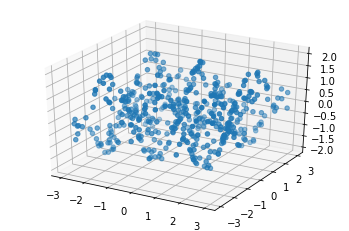

In [28]:
# Generating Data Example
N = 500
X_1 = np.random.random(N)*6 - 3
X_2 = np.random.random(N)*6 - 3 # make it between (-3,3)
Y = np.sin(3*X_1)+np.sin(2*X_2)

# Data Visualizaion 
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X_1,X_2,Y)
plt.show()

$$
Y = sin(3X_1)+sin(2X_2)
$$

In [29]:
# Regression Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape = (2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

# Complile the Optimizers
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')

In [30]:
# Model Fitting
r = model.fit(X, Y, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 1.0987
Epoch 2/100
16/16 [==============================] - 0s 934us/step - loss: 1.0525
Epoch 3/100
16/16 [==============================] - 0s 969us/step - loss: 1.0490
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 1.0470
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 1.0415
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 1.0541
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 1.0319
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 1.0314
Epoch 9/100
16/16 [==============================] - 0s 997us/step - loss: 1.0337
Epoch 10/100
16/16 [==============================] - 0s 989us/step - loss: 1.0387
Epoch 11/100
16/16 [==============================] - 0s 1ms/step - loss: 1.0255
Epoch 12/100
16/16 [==============================] - 0s 1ms/step - loss: 1.0288
Epoch 13/100
16/16 [=========

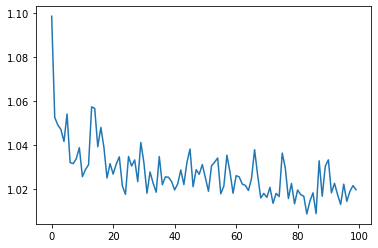

In [31]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

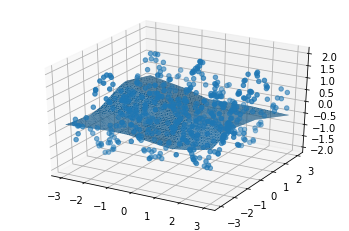

In [34]:
# Show the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_1, X_2, Y)

# Surface Plot
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth = 0.2, antialiased = True)
plt.show()